<a id='top'></a>

# CSCI3022 S23



# Homework 2: Measures of Centrality and Dispersion; Visualizing Data

## Due Monday, January 30th at 11:59pm to Gradescope
***

**Name**: ___Owen Kutzscher____________________

***

***
### Collaboration Policy

While completing the assignment you are not allowed to consult any source other than the course textbooks/online reference links provided on Canvas, your own class notes, and/or the posted lecture slides/in-class Jupyter notebooks.   You may discuss questions you have with your classmates or on Piazza or in office hours, but all work you submit must be your own, which means when writing up your solutions or code, you MUST do it entirely by yourself. 

You should be able to easily reproduce from scratch and explain a solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam without referencing your notes/book/HW.   


**Do not search/ask for a solution online**: You may not actively search for a solution to the problems below from the internet. This includes posting to or using sources like ChatGPT, StackExchange, Reddit, Chegg, CourseHero, etc.  

**We are here to help!  Visit HW Hours and/or post questions on Piazza!**


Copying/consulting from the solution of another classmate or an online solution (or providing a classmate your solution) constitutes a **violation of the course's collaboration policy and the honor code and will result in an F in the course and a trip to the honor council**.   






### Instructions for Submitting in Correct Format 

You must submit a PDF of this Juptyer notebook to Gradescope by the deadline listed above.  Submissions that are not a PDF or that are not submitted to Gradescope will not be counted for credit.  

$\color{red}{\text{Before submitting your PDF, make sure that your LaTeX has rendered correctly in your PDF.}}$
$\color{red}{\text{Any of your solutions with incorrectly rendered or incompletely rendered LaTeX will be given 0 points.}}$ 

- There are several ways to quickly make a .pdf out of this notebook for Gradescope submission.  
 
 - If you are running Juptyer locally on your computer: 
 
     - Option1 : Select Kernel->Restart & Run All. Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"
 
     - Option 2: Select Kernel->Restart & Run All. Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 
 - If you are running using CSEL: 
 
     - Option1 :  Go to File ->Save & Export Notebook As-> HTML.  Then open the HTML, and then Right-Click -> Print and select "Print to PDF".  
     - Option2 :  Go to File ->Download. Then use this converter https://htmtopdf.herokuapp.com/ipynbviewer/ to convert ipynb to pdf.
 
### Notes
- For full points you must correctly match your questions to the respective Gradescope problem, and include clear comments in your code.   Please note that any LaTeX that is not correctly rendered in your submitted PDF will result in a 0 on the entire problem(s) that involves the unrendered LaTeX. 
- For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Any relevant data sets are available on Canvas. 
- LaTeX Tips:  Here is a [reference guide] (https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference).  **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 

- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline


## (14 pts) Problem 1: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to represent a data problem, and questions of *how* to compute that data value.  Prior lectures should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**: (1 pt)

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the **mean** of a data set with $n$ observations? (assume $n>1$).  Explain your answer.

$n$ opperations. The **mean** of a data set is calculated by adding up all the data values, and then dividing by the number of data values. So we add up $n$ data points, and then divide by the number $n$. Adding up all the numbers will take $n-1$ opperations (start with the first number, then after that adding any other number will be an opperation). And dividing by $n$ will take $1$ opperation. So the total opperations is $n-1+1 = n$ opperations.


**Part B**: (2 pts)  
i).  Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). 

ii).  Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). 

You may **not** use any built-in sample mean or variance functions.  Hint:  Try to do this without using any `for` loops.

In [2]:

def my_sample_mean(dataArr):
    return dataArr.mean()

def my_sample_var(dataArr):
    return dataArr.var(ddof=1)


**Part C**: (1 pt)  Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon:

`bus = [4, 10, 0, 312, 22, 39, 81, 19, 8, 60, 1,3,80, 42,12,1]`

In [3]:
bus = np.array([4, 10, 0, 312, 22, 39, 81, 19, 8, 60, 1,3,80, 42,12,1])

print("Sample mean of data is:", my_sample_mean(bus))
print("Sample variance of data is:", my_sample_var(bus))

Sample mean of data is: 43.375
Sample variance of data is: 5884.516666666666


**Part D**: (1 pt)

Now suppose our data is streaming- we slowly add observations one at a time, instead of seeing the entire data set at once. We are still interested in the mean.

Suppose we inefficiently recalculate the mean by brute force after each new observation is added to our data set. In this brute force calculation we do not save any information from previous mean calculations (for example, we would start by computing the mean of first two points, then when a 3rd data point is added we would recompute the mean of the first three datapoints (without using any information we gathered when calculating the mean of the first 2 data points), and so forth until we had compiled all $n$ means). 

How many floating point operations are spent computing (and re-computing) the $n$ means of a streaming data set of size $n$ in this inefficient brute force manner?  (Note that the mean of the first data point is just itself, so no floating-point computations are required to compute the first mean). 

Use formulas for summations from Calculus 2 (https://tutorial.math.lamar.edu/classes/calci/summationnotation.aspx)  to fully simplify your answer in closed form (i.e. without using sigma notation) in terms of $n$: 

I will call each data point $a$

To performing this method of ineffeicient calculation would look like:
$$a_1 , \frac{(a_1 + a_2)}{2} , \frac{(a_1 + a_2 + a_3)}{3} , ... , \frac{(a_1 + a_2 + ... a_n)}{n}$$

The total count of all bottom opperations (dividing by a number 2 through n) is
$$n - 1$$
The total count of all top opperations (adding the data values together before dividing) is
$$\sum_{k=2}^{n} k = (\sum_{k=1}^{n} k )- 1$$
$$ \implies (\sum_{k=1}^{n} k )- 1 = \frac{n(n+1)}{2} - 1$$

Adding these together we find the total count of opperatoins is
$$ n + \frac{n(n+1)}{2} - 2$$




We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 


<a id='eq2'></a>
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
\tag{Equation 2}
$$


**Part E**  (2 pts)
Prove mathematically why Equation 2 is true using the definition(s) of $\bar{x}_n$ and $\bar{x}_{n-1}$.



# do this later or not at all. Plug in definitions of Xn and Xn-1, convert to closed form (not sigma notation), and simplify.

**Part F**: (2 pts)  Implement a third function called `update_mean` that implements Equation 2. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. 



In [4]:
def update_mean(prev_mean, xn, n):
    new_mean = prev_mean + ((xn - prev_mean)/n)
    return(new_mean)



**Part G** (2 pts) Use the function you created in Part F to compute the values that you get from finding the mean of the first two buff buses' lateness, then the mean first three buff buses' lateness, and so on up to all of the `bus` data points from **Part C**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 16 estimates in `buffbus_bad_means`.

In [5]:
# uhhhhhhhh idk do this later
# the function is correct tho!


To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [6]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part H**: (1 pt)

How many floating point operations were spent computing the 16 means in your code in part G? (Again you can assume that no floating point operations are required for the first mean).  Is this truly better than the uninformed approach from part D?

**Part I:** (2 pts)
A similar result to the formula preceding part E holds for variance.  In particular, we can write that:

$$
\displaystyle s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

Describe in **words** and/or **psuedocode** how you might adapt the function you made in part **F** to perform running calculations of both variance and mean.  Be very clear as to what the input/instantiation arguments would be as well as what the output arguments would be in addition to any intermediate calculations.

input:
same as before: prev_mean, xn, n


make a new variable, new_variance
set new_variance = use the s^2 equation

output:
return new_mean, new_variance

# Problem 2  (13 pts):  Data Visualization; Means & Variances
***

For Problem 2 we are looking at the data from a study investigating school childrens' intelligence. The data consists of a random sample of 1500 participants and some of their data.

Import the csv file, "foot_smart.csv".  Create a dataframe called `dfFootIQ` and take a look at it.

In [7]:
dfFootIQ = pd.read_csv("foot_smart.csv")
dfFootIQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   foot_length  1500 non-null   float64
 1   shoe_size    1500 non-null   int64  
 2   sex          1500 non-null   int64  
 3   IQ           1500 non-null   float64
 4   US_section   1500 non-null   object 
 5   city_size    1500 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 70.4+ KB


# Description of this data Set

This is a data set of 1500 participants. The participants are all children from 7 different schools. 

***foot_length:*** This is the length of the students foot in inches.

***shoe_size:*** This is the size of the shoe worn by the student.

***sex:*** This is the sex of the student: 0 female, 1 male.

***IQ:*** This is a measure of intelligence as measured on a standard exam, scaled from 0 to 35.

***US_section:*** This is the section of the U.S. that the student comes from.

***city_size:*** This is the approximate size of the city (in thousands) from which the student came from.

***Part a] (1 pt) Clean the data***

Notice that `city_size` has data entered as '100K' for 100,000 and 1M for 1,000,000.

Clean this column so that it holds integers such as 100000 and 1000000 instead of 100K and 1M. 

In [8]:
def fix_city_size(val):
    
    if type(val) == int:
        return val
    
    val = val.replace('K', '')
    val = val.replace('M', '')
    val = val.replace(',','')
    return int(val)

dfFootIQ.loc[:, "city_size"] = dfFootIQ.loc[:, "city_size"].apply(fix_city_size)

/tmp/ipykernel_315/2621444192.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfFootIQ.loc[:, "city_size"] = dfFootIQ.loc[:, "city_size"].apply(fix_city_size)


***Part b]*** Suppose we were to make a scatterplot for foot length and city size (`foot_length` and `city_size`).



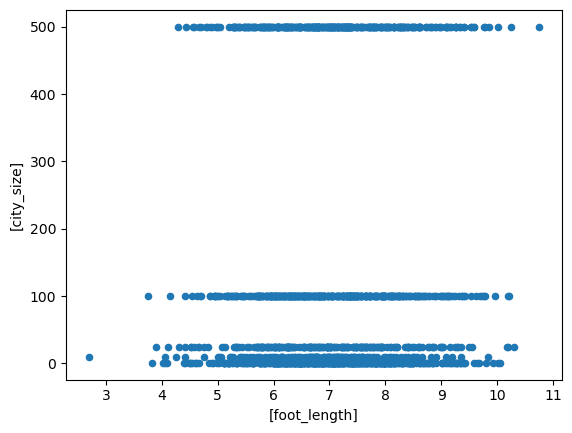

In [9]:
# Uncomment the code below and run it.

ax1 = dfFootIQ.plot.scatter(x=['foot_length'], y=['city_size'])

***Note (i)*** The scatter plot has discrete values on the y-axis which makes the 'scatter plot' look like lines.

***Note (ii)*** There is no discernible pattern. The city's of various sizes (on the y-axis) contain students with shoe sizes (on the x-axis) all across the shoe-size spectrum which means students of a particular shoe size do not tend to congregate in citys  of a particular size.

This seems to be common sense; for instance, there is no reason why every student of shoe size 7 would come from a city of size 500,000.

***Make two more scatterplots:***

   i] ***(0.5 points)*** A scatterplot for shoe_size and IQ

   ii] ***(0.5 points)*** A scatterplot for foot_length and IQ

iii] ***(1 point)*** Explain your findings. Either explain why no pattern is found, or if you detect a pattern, then explain why such a pattern exists between shoe size and intelligence.

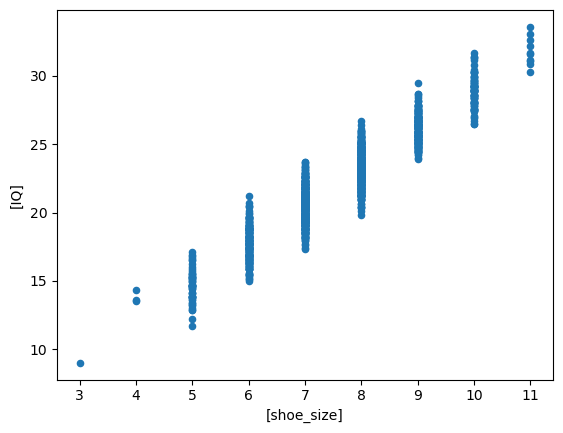

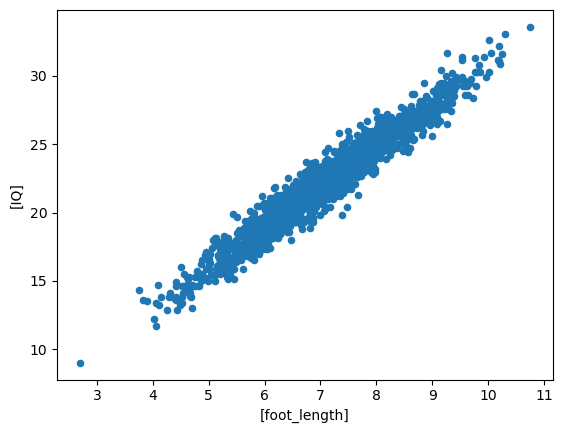

In [10]:
# Code your scatterplots for Part B here

axi = dfFootIQ.plot.scatter(x=['shoe_size'], y=['IQ'])
axii = dfFootIQ.plot.scatter(x=['foot_length'], y=['IQ'])

***Explain your scatterplot findings for Part B here:***

Well, it seems that larger foot size correlates to a higher IQ, as does larger foot length. I think this makes sense. Short people are stupid. Just kidding. I predict this is because the taller people had an easier time seeing the testing stations, and the smarter ones were more likley to be interested and get tested. (Actually this is not a valid argument, that doesn't explain why shorter people have a consistently smaller IQ score...)

***Part c]*** 
We're interested in investigating how the mean changes if you add or multiply each of the data points by a constant.  

i).(0.5 pts)  Find the mean shoe size for the dfFootIQ data (you CAN use built-in functions to do this).


In [11]:
mean_shoe_size = dfFootIQ.loc[:, 'shoe_size'].mean()
round(mean_shoe_size, 1)

7.6

ii). (1 pt) In class, we proved what will happen to the mean if we add any constant $a$ to each data point.  First, explain what the new mean should be (in terms of $a$) based on what we derived in class.  

new mean will be $prevMean+a = 8.6$

 iii). (1 pt)  Then show this via code for $a=2$, by actually adding 2 to each shoe size data point in dfFootIQ and calculating the new mean.  

In [12]:
# add 2 to each shoe_size data point
dfFootIQ.loc[:, "shoe_size"] = dfFootIQ.loc[:, "shoe_size"] + 2

# display new mean
mean_shoe_size_plus_two = dfFootIQ.loc[:, 'shoe_size'].mean()
print(round(mean_shoe_size_plus_two, 1))

# set shoe_size data back to the origional data
dfFootIQ.loc[:, "shoe_size"] = dfFootIQ.loc[:, "shoe_size"] - 2 

9.6


iv). (1 pt)  What if we multiply each term by a constant $c$?  Prove mathematically what the new mean will be (in terms of $c$).  Use the definition of $\bar{x}_n$ from ([Equation 1](#eq1)).


$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n c x_k
$$

$$
\implies c\frac{1}{n}\sum_{k=1}^n x_k
$$

$$
\implies c\bar{x}_n
$$

v). (1 pt)  Then show this via code for $c=3$, by actually multiplying each shoe size data point in dfFootIQ by $3$ and calculating the new mean.  

In [13]:
# multiplu each shoe_size data point by 3
dfFootIQ.loc[:, "shoe_size"] = dfFootIQ.loc[:, "shoe_size"] *3

# display new mean
mean_shoe_size_times_three = dfFootIQ.loc[:, 'shoe_size'].mean()
print(round(mean_shoe_size_times_three, 1))

# set shoe_size data back to the origional data
dfFootIQ.loc[:, "shoe_size"] = dfFootIQ.loc[:, "shoe_size"] /3

22.7


/tmp/ipykernel_315/2693927561.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfFootIQ.loc[:, "shoe_size"] = dfFootIQ.loc[:, "shoe_size"] /3


***Part d]***
We're interested in investigating how the variance changes if you add or multiply each of the data points by a constant.  

i). (0.5 pt)  Find the sample variance shoe size for the dfFootIQ data (you CAN use built-in functions to do this).


In [14]:
print(round(dfFootIQ.loc[:, "shoe_size"].var(),1))

# pandas calculates this assuming sample data

1.5


ii). (1 pt)  In class, we proved what will happen to the variance if we add any constant $a$ to each data point.  First, explain what the new variance will be based on what we derived in class.  

nothing will happen to the variance if we add a constant $a$ to each data point

iii). (1 pt)  Then show this via code for $a=2$, by actually adding 2 to each shoe size data point and calculating the new variance.  

In [15]:
# add 2 to each shoe_size data point
dfFootIQ.loc[:, "shoe_size"] = dfFootIQ.loc[:, "shoe_size"] +2

# display new varince
mean_shoe_size_times_three = dfFootIQ.loc[:, 'shoe_size'].var()
print(round(mean_shoe_size_times_three, 1))

# set shoe_size data back to the origional data
dfFootIQ.loc[:, "shoe_size"] = dfFootIQ.loc[:, "shoe_size"] - 2

1.5


iv). (2 pts)  What if we multiply each term by a constant $c$?  Prove mathematically what the new variance will be (in terms of $c$).  Use the definition of $s_n^2$ from ([Equation 1](#eq1)).


The new variance will be:
previous variance * $c^2$

$$
s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$


$\frac{1}{n-1}\sum_{k=1}^n \left( cx_k - c\bar{x}_n\right)^2$

$\implies \frac{1}{n-1}\sum_{k=1}^n \left(c(x_k - \bar{x}_n\right))^2$

$\implies \frac{1}{n-1}\sum_{k=1}^n c^2  \left (x_k - \bar{x}_n\right)^2$

$\implies c^2 \frac{1}{n-1}\sum_{k=1}^n \left (x_k - \bar{x}_n\right)^2$

$$
c^2 s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( cx_k - c\bar{x}_n\right)^2
$$

v). (1 pt) Then show this via code for $c=3$, by actually multiplying each shoe size data point in dfFootIQ by $3$ and calculating the new variance.  

In [16]:
# multiply each data point by 3
dfFootIQ.loc[:, "shoe_size"] = dfFootIQ.loc[:, "shoe_size"] * 3

# display new varince
mean_shoe_size_times_three = dfFootIQ.loc[:, 'shoe_size'].var()
print(round(mean_shoe_size_times_three, 1))

# set shoe_size data back to the origional data
dfFootIQ.loc[:, "shoe_size"] = dfFootIQ.loc[:, "shoe_size"] / 3

13.5


[Back to top](#top)
<a id='p3'></a>

## (23 pts) Problem 3: Practice (Titanic)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `dirty_titanic_data` file from the in-class notebook exercises.

In [17]:
#Import the dataset and take a look at it

titanic_data = pd.read_csv("titanic_data.csv")

titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,4.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,24.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,NaN,0,0,111369,30.0000,C148,C


**Part A**: (2 pts) Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [18]:
# dfTitanic = titanic_data.dropna() ### dropna will not work here!!!!!!

dfTitanic = titanic_data
dfTitanic = dfTitanic.dropna(subset=['Survived', 'Pclass', 'Age', 'Sex'])
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     713 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


**Part B** (1 pt):
Based on the overall population of passengers, report the proportion that survived (round your answer to the nearest ten thousandth).

$$P(Survived=1)$$

In [19]:
survival_count = 0

# count all passengers who survived
for x in dfTitanic.loc[:, "Survived"]:
    if x == 1:
        survival_count = survival_count + 1

# Probabilty of survival is passergersWhoSurvived/allPassengers
p_survived = round(survival_count / len(dfTitanic)*100, 2)

# print our findings
print("The probability of surviving the titanic is:", p_survived)
        
    

The probability of surviving the titanic is: 39.08


**Part C** (2 pts): 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

Class warfare:
We would expect to see a corelation in higher Pclass (class status) number and individuals who died. (We should see the inverse aswell!)

Male chivalry:
We would expect to see that more women survived than men

**Part D**: (8 pts) 
Write code to compute the following:

i).  What percent of males survived?  What percent of females survived?  
ii).  What percent of first class travelers survived?  What about 2nd class?  What about third class?    
iii).  Finally, compute the percent of survivors of men *within* each passenger class and then do the same for women (you should have 6 subsets).   

iv).   Then, answer the following questions:
* **(a)** When reviewing gender survival percentages, how do the results compare to the base survival percentage from **Part B**?
* **(b)** When reviewing class survival percentages, how do the results compare to the base survival percentage from **Part B**?

* **(c)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(d)**  Did men in first class or women in third class have a higher survival percentage?


In [20]:
# Your code should output 6 different percentages here. One of these (to check your answer) should be that  13.8%
# of 3rd class males survived.



male_survival = round((len(dfTitanic.loc[dfTitanic["Sex"]=="male"]) / len(dfTitanic))*100, 2)

print(male_survival, "% of males survived")

64.85 % of males survived


**Part E**: (2 pts) One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.


i).  Calculate the median age of passengers who survived and compare it to the median age of those who did not.  You may use built-in function(s).  

ii).  Calculate the IQR for the ages of passengers who survived, and a separate IQR for the ages of passengers who did not.  The only built-in method you may use as part of your calculation is the `pandas.DataFrame.quantile`
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html


 **Part F** (2 pts)
Create two side-by-side box and whisker plots comparing the ages of passengers who survived, and the ages of passengers who did not. 
 



**Part G** (3 pts) In addition to using boxplots, we can also visualize data using histograms.  
Plot two stacked density histograms showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not.  
* Use the bin edges $[0,3,6,\ldots,75,78,81]$ for both histograms.
* Include a legend (`plt.legend` after `label=` on the histograms) and label your axes.
* Comment on the results. How would you characterize each distribution? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

**Part H: (1 pt)** In Part G, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Part I** (2 pts) : Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

## Final Answers To Selected Problems

These are final answers for selected problems so you can check your work and determine if you are on the right track.  To receive credit on each problem you must show all steps leading to these answers, fully answer the problem, and justify your answer using correct mathematical notation.


1D).  $\frac{n^2+n-2}{2}$

3B).  $39.08\%$

3D iii).  Your code should output 6 different percentages here.  One of these (to check your answer) should be that $13.8\%$ of 3rd class males survived.  

